Evaluating Logistic Regression with Cross-Validation.

 Preprocessing the Dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


data = pd.read_csv(r'E:\data set\Task-14\titanic.csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Preprocessing and Feature Engineering

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Separating the target variable (Survived) and the features
X = data.drop(columns=['Survived'])
y = data['Survived']

# List of numerical and categorical columns
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Defining transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing values with mean
    ('scaler', StandardScaler())  # Standardizing numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical variables
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline that first preprocesses the data, then applies logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Performing k-fold cross-validation (let's use 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Displaying the cross-validation scores and their mean
cv_scores_mean = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores_mean)


Cross-validation scores: [0.78212291 0.81460674 0.78089888 0.76966292 0.80337079]
Mean cross-validation score: 0.7901324461741258


Single Train-Test Split Evaluation


In [4]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Evaluating the model's accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7932960893854749


Analyzing Overfitting and Underfitting in Decision Trees

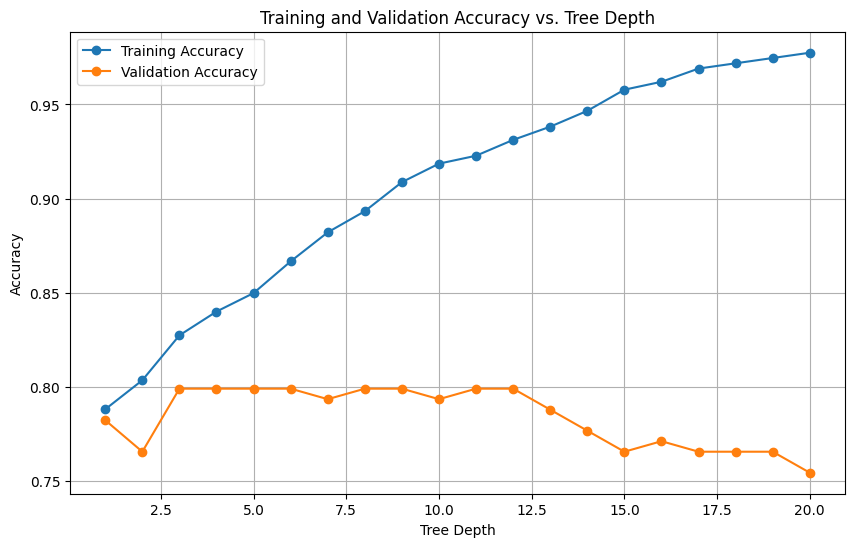

In [6]:
# Dropping columns that are not useful for prediction or too complex to encode (e.g., Name, Ticket, Cabin)
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])

# Check if any remaining categorical columns need encoding
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Updating the categorical transformer to handle remaining categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical variables
])

# Keeping the numerical transformer the same
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing values
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Re-run the training loop with the corrected pipeline
train_accuracies = []
validation_accuracies = []

# Loop over different tree depths
depths = range(1, 21)  # Tree depths from 1 to 20

for depth in depths:
    # Initialize a decision tree with the current depth
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(max_depth=depth, random_state=42))])
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the training data
    y_train_pred = model.predict(X_train)
    
    # Predict on the validation data
    y_test_pred = model.predict(X_test)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate validation accuracy
    validation_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the accuracies
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, validation_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


Calculating Precision, Recall, and F1-Score for Logistic Regression

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Train the logistic regression model
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(random_state=42))])

log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Optionally, print a full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Precision: 0.7606
Recall: 0.7297
F1-Score: 0.7448

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



 ROC Curve and AUC Calculation

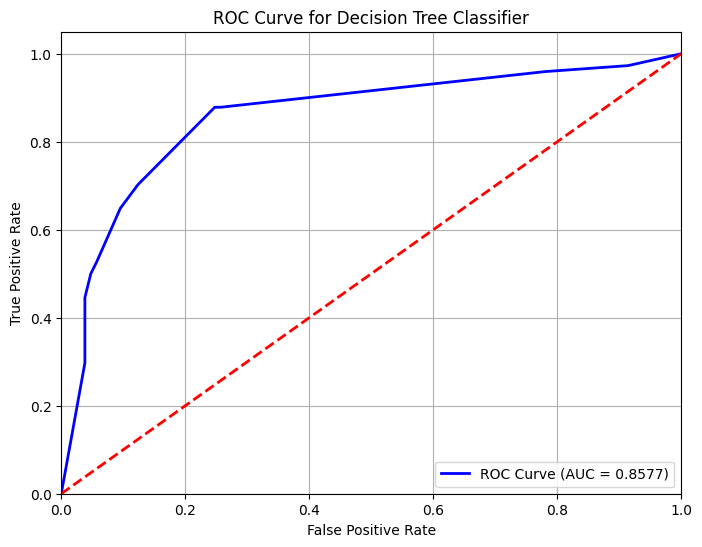

In [8]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Train the decision tree classifier
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))])

decision_tree.fit(X_train, y_train)

# Predict probabilities for the test data
y_proba = decision_tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Performance Without Cross-Validation (Using Train-Test Split):

In [9]:
from sklearn.metrics import accuracy_score

# Logistic Regression without Cross-Validation
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(random_state=42))])

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree without Cross-Validation
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))])

decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Performance Metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

print("Without Cross-Validation:")
print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.4f}, Precision: {precision_log_reg:.4f}, Recall: {recall_log_reg:.4f}")
print(f"Decision Tree - Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}")


Without Cross-Validation:
Logistic Regression - Accuracy: 0.7933, Precision: 0.7606, Recall: 0.7297
Decision Tree - Accuracy: 0.7989, Precision: 0.8276, Recall: 0.6486


Performance With Cross-Validation

In [10]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with Cross-Validation
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_precision_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='precision')
cv_recall_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='recall')

# Decision Tree with Cross-Validation
cv_scores_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
cv_precision_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='precision')
cv_recall_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='recall')

print("\nWith Cross-Validation:")
print(f"Logistic Regression - CV Accuracy: {cv_scores_log_reg.mean():.4f}, CV Precision: {cv_precision_log_reg.mean():.4f}, CV Recall: {cv_recall_log_reg.mean():.4f}")
print(f"Decision Tree - CV Accuracy: {cv_scores_tree.mean():.4f}, CV Precision: {cv_precision_tree.mean():.4f}, CV Recall: {cv_recall_tree.mean():.4f}")



With Cross-Validation:
Logistic Regression - CV Accuracy: 0.7901, CV Precision: 0.7441, CV Recall: 0.6928
Decision Tree - CV Accuracy: 0.8171, CV Precision: 0.8218, CV Recall: 0.6693


In [13]:
from sklearn.ensemble import RandomForestClassifier  # Add this import statement

# Random Forest Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Evaluation:
Accuracy: 0.7877
Precision: 0.7432
Recall: 0.7432
F1-Score: 0.7432

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

